# AIM

The aim of road accident prediction is to develop models or systems that can accurately forecast the likelihood of road accidents occurring in specific areas, at particular times, or under certain conditions.

# Features Description

Accident_Index: A unique identifier for each accident.

Accident Date: The date on which the accident occurred.

Day_of_Week: The day of the week when the accident occurred.

Junction_Control: Indicates the type of control at the junction where the accident occurred (e.g., traffic signals, stop sign, roundabout).

Junction_Detail: Provides detailed information about the junction where the accident occurred (e.g., crossroads, T-junction).

Accident_Severity: Indicates the severity of the accident (e.g., slight, serious, fatal).

Latitude: The latitude coordinate of the accident location.

Light_Conditions: Describes the lighting conditions at the time of the accident (e.g., daylight, darkness with street lights, darkness without street lights).

Local_Authority_(District): The local authority district where the accident occurred.

Carriageway_Hazards: Describes any hazards present on the carriageway at the time of the accident (e.g., debris, oil spill).

Longitude: The longitude coordinate of the accident location.

Number_of_Casualties: The total number of casualties involved in the accident.

Number_of_Vehicles: The total number of vehicles involved in the accident.

Police_Force: The police force that attended the accident scene.

Road_Surface_Conditions: Describes the road surface conditions at the time of the accident (e.g., dry, wet, snow, ice).

Road_Type: Describes the type of road where the accident occurred (e.g., single carriageway, dual carriageway, roundabout).

Speed_limit: The speed limit on the road where the accident occurred.

Time: The time of day when the accident occurred.

Urban_or_Rural_Area: Indicates whether the accident occurred in an urban or rural area.

Weather_Conditions: Describes the weather conditions at the time of the accident (e.g., fine, raining, snowing, fog).






# importing liabraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\Ashutosh Tripathi\Downloads\Road Accident Data.csv (1).zip")
df

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307968,201091NM01760,2/18/2022,Thursday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.374005,Daylight,Highland,NaN,...,2,1,Northern,Dry,Single carriageway,60,7:00,Rural,Fine no high winds,Car
307969,201091NM01881,2/21/2022,Sunday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.232273,Darkness - no lighting,Highland,NaN,...,1,1,Northern,Frost or ice,Single carriageway,60,3:00,Rural,Fine no high winds,Car
307970,201091NM01935,2/23/2022,Tuesday,Give way or uncontrolled,T or staggered junction,Slight,57.585044,Daylight,Highland,NaN,...,1,3,Northern,Frost or ice,Single carriageway,30,9:38,Rural,Fine no high winds,Car
307971,201091NM01964,2/23/2022,Tuesday,Give way or uncontrolled,T or staggered junction,Serious,57.214898,Darkness - no lighting,Highland,NaN,...,1,2,Northern,Wet or damp,Single carriageway,60,18:25,Rural,Fine no high winds,Motorcycle over 500cc


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307973 non-null  object 
 1   Accident Date               307973 non-null  object 
 2   Day_of_Week                 307973 non-null  object 
 3   Junction_Control            307973 non-null  object 
 4   Junction_Detail             307973 non-null  object 
 5   Accident_Severity           307973 non-null  object 
 6   Latitude                    307973 non-null  float64
 7   Light_Conditions            307973 non-null  object 
 8   Local_Authority_(District)  307973 non-null  object 
 9   Carriageway_Hazards         5424 non-null    object 
 10  Longitude                   307973 non-null  float64
 11  Number_of_Casualties        307973 non-null  int64  
 12  Number_of_Vehicles          307973 non-null  int64  
 13  Police_Force  

# Exploratory Data Analysis

In [4]:
list_1=["Day_of_Week","Light_Conditions","Latitude","Longitude","Road_Type","Weather_Conditions"]
list_1

['Day_of_Week',
 'Light_Conditions',
 'Latitude',
 'Longitude',
 'Road_Type',
 'Weather_Conditions']

In [5]:
for i in list_1:
    df=df.drop([i],axis=1)
df    


,Accident_Index,Accident Date,Junction_Control,Junction_Detail,Accident_Severity,Local_Authority_(District),Carriageway_Hazards,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Speed_limit,Time,Urban_or_Rural_Area,Vehicle_Type
0,200901BS70001,1/1/2021,Give way or uncontrolled,T or staggered junction,Serious,Kensington and Chelsea,NaN,1,2,Metropolitan Police,Dry,30,15:11,Urban,Car
1,200901BS70002,1/5/2021,Give way or uncontrolled,Crossroads,Serious,Kensington and Chelsea,NaN,11,2,Metropolitan Police,Wet or damp,30,10:59,Urban,Taxi/Private hire car
2,200901BS70003,1/4/2021,Give way or uncontrolled,T or staggered junction,Slight,Kensington and Chelsea,NaN,1,2,Metropolitan Police,Dry,30,14:19,Urban,Taxi/Private hire car
3,200901BS70004,1/5/2021,Auto traffic signal,T or staggered junction,Serious,Kensington and Chelsea,NaN,1,2,Metropolitan Police,Frost or ice,30,8:10,Urban,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Auto traffic signal,Crossroads,Serious,Kensington and Chelsea,NaN,1,2,Metropolitan Police,Dry,30,17:25,Urban,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307968,201091NM01760,2/18/2022,Data missing or out of range,Not at junction or within 20 metres,Slight,Highland,NaN,2,1,Northern,Dry,60,7:00,Rural,Car
307969,201091NM01881,2/21/2022,Data missing or out of range,Not at junction or within 20 metres,Slight,Highland,NaN,1,1,Northern,Frost or ice,60,3:00,Rural,Car
307970,201091NM01935,2/23/2022,Give way or uncontrolled,T or staggered junction,Slight,Highland,NaN,1,3,Northern,Frost or ice,30,9:38,Rural,Car
307971,201091NM01964,2/23/2022,Give way or uncontrolled,T or staggered junction,Serious,Highland,NaN,1,2,Northern,Wet or damp,60,18:25,Rural,Motorcycle over 500cc


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Accident_Index              307973 non-null  object
 1   Accident Date               307973 non-null  object
 2   Junction_Control            307973 non-null  object
 3   Junction_Detail             307973 non-null  object
 4   Accident_Severity           307973 non-null  object
 5   Local_Authority_(District)  307973 non-null  object
 6   Carriageway_Hazards         5424 non-null    object
 7   Number_of_Casualties        307973 non-null  int64 
 8   Number_of_Vehicles          307973 non-null  int64 
 9   Police_Force                307973 non-null  object
 10  Road_Surface_Conditions     307656 non-null  object
 11  Speed_limit                 307973 non-null  int64 
 12  Time                        307956 non-null  object
 13  Urban_or_Rural_Area         3

In [7]:
df.isnull().sum()

Accident_Index                     0
Accident Date                      0
Junction_Control                   0
Junction_Detail                    0
Accident_Severity                  0
Local_Authority_(District)         0
Carriageway_Hazards           302549
Number_of_Casualties               0
Number_of_Vehicles                 0
Police_Force                       0
Road_Surface_Conditions          317
Speed_limit                        0
Time                              17
Urban_or_Rural_Area                0
Vehicle_Type                       0
dtype: int64

In [8]:
df["Carriageway_Hazards"].mode()

0    Other object on road
Name: Carriageway_Hazards, dtype: object

In [9]:
df["Carriageway_Hazards"].replace(np.nan, "Other object on road",inplace=True)
df

,Accident_Index,Accident Date,Junction_Control,Junction_Detail,Accident_Severity,Local_Authority_(District),Carriageway_Hazards,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Speed_limit,Time,Urban_or_Rural_Area,Vehicle_Type
0,200901BS70001,1/1/2021,Give way or uncontrolled,T or staggered junction,Serious,Kensington and Chelsea,Other object on road,1,2,Metropolitan Police,Dry,30,15:11,Urban,Car
1,200901BS70002,1/5/2021,Give way or uncontrolled,Crossroads,Serious,Kensington and Chelsea,Other object on road,11,2,Metropolitan Police,Wet or damp,30,10:59,Urban,Taxi/Private hire car
2,200901BS70003,1/4/2021,Give way or uncontrolled,T or staggered junction,Slight,Kensington and Chelsea,Other object on road,1,2,Metropolitan Police,Dry,30,14:19,Urban,Taxi/Private hire car
3,200901BS70004,1/5/2021,Auto traffic signal,T or staggered junction,Serious,Kensington and Chelsea,Other object on road,1,2,Metropolitan Police,Frost or ice,30,8:10,Urban,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Auto traffic signal,Crossroads,Serious,Kensington and Chelsea,Other object on road,1,2,Metropolitan Police,Dry,30,17:25,Urban,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307968,201091NM01760,2/18/2022,Data missing or out of range,Not at junction or within 20 metres,Slight,Highland,Other object on road,2,1,Northern,Dry,60,7:00,Rural,Car
307969,201091NM01881,2/21/2022,Data missing or out of range,Not at junction or within 20 metres,Slight,Highland,Other object on road,1,1,Northern,Frost or ice,60,3:00,Rural,Car
307970,201091NM01935,2/23/2022,Give way or uncontrolled,T or staggered junction,Slight,Highland,Other object on road,1,3,Northern,Frost or ice,30,9:38,Rural,Car
307971,201091NM01964,2/23/2022,Give way or uncontrolled,T or staggered junction,Serious,Highland,Other object on road,1,2,Northern,Wet or damp,60,18:25,Rural,Motorcycle over 500cc


In [10]:
df["Road_Surface_Conditions"].mode()

0    Dry
Name: Road_Surface_Conditions, dtype: object

In [11]:
df["Road_Surface_Conditions"].replace(np.nan,"Dry", inplace=True)
df

,Accident_Index,Accident Date,Junction_Control,Junction_Detail,Accident_Severity,Local_Authority_(District),Carriageway_Hazards,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Speed_limit,Time,Urban_or_Rural_Area,Vehicle_Type
0,200901BS70001,1/1/2021,Give way or uncontrolled,T or staggered junction,Serious,Kensington and Chelsea,Other object on road,1,2,Metropolitan Police,Dry,30,15:11,Urban,Car
1,200901BS70002,1/5/2021,Give way or uncontrolled,Crossroads,Serious,Kensington and Chelsea,Other object on road,11,2,Metropolitan Police,Wet or damp,30,10:59,Urban,Taxi/Private hire car
2,200901BS70003,1/4/2021,Give way or uncontrolled,T or staggered junction,Slight,Kensington and Chelsea,Other object on road,1,2,Metropolitan Police,Dry,30,14:19,Urban,Taxi/Private hire car
3,200901BS70004,1/5/2021,Auto traffic signal,T or staggered junction,Serious,Kensington and Chelsea,Other object on road,1,2,Metropolitan Police,Frost or ice,30,8:10,Urban,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Auto traffic signal,Crossroads,Serious,Kensington and Chelsea,Other object on road,1,2,Metropolitan Police,Dry,30,17:25,Urban,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307968,201091NM01760,2/18/2022,Data missing or out of range,Not at junction or within 20 metres,Slight,Highland,Other object on road,2,1,Northern,Dry,60,7:00,Rural,Car
307969,201091NM01881,2/21/2022,Data missing or out of range,Not at junction or within 20 metres,Slight,Highland,Other object on road,1,1,Northern,Frost or ice,60,3:00,Rural,Car
307970,201091NM01935,2/23/2022,Give way or uncontrolled,T or staggered junction,Slight,Highland,Other object on road,1,3,Northern,Frost or ice,30,9:38,Rural,Car
307971,201091NM01964,2/23/2022,Give way or uncontrolled,T or staggered junction,Serious,Highland,Other object on road,1,2,Northern,Wet or damp,60,18:25,Rural,Motorcycle over 500cc


In [12]:
df["Time"].mode()

0    17:00
Name: Time, dtype: object

In [13]:
df["Time"].replace(np.nan, "17:00", inplace=True)
df

,Accident_Index,Accident Date,Junction_Control,Junction_Detail,Accident_Severity,Local_Authority_(District),Carriageway_Hazards,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Speed_limit,Time,Urban_or_Rural_Area,Vehicle_Type
0,200901BS70001,1/1/2021,Give way or uncontrolled,T or staggered junction,Serious,Kensington and Chelsea,Other object on road,1,2,Metropolitan Police,Dry,30,15:11,Urban,Car
1,200901BS70002,1/5/2021,Give way or uncontrolled,Crossroads,Serious,Kensington and Chelsea,Other object on road,11,2,Metropolitan Police,Wet or damp,30,10:59,Urban,Taxi/Private hire car
2,200901BS70003,1/4/2021,Give way or uncontrolled,T or staggered junction,Slight,Kensington and Chelsea,Other object on road,1,2,Metropolitan Police,Dry,30,14:19,Urban,Taxi/Private hire car
3,200901BS70004,1/5/2021,Auto traffic signal,T or staggered junction,Serious,Kensington and Chelsea,Other object on road,1,2,Metropolitan Police,Frost or ice,30,8:10,Urban,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Auto traffic signal,Crossroads,Serious,Kensington and Chelsea,Other object on road,1,2,Metropolitan Police,Dry,30,17:25,Urban,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307968,201091NM01760,2/18/2022,Data missing or out of range,Not at junction or within 20 metres,Slight,Highland,Other object on road,2,1,Northern,Dry,60,7:00,Rural,Car
307969,201091NM01881,2/21/2022,Data missing or out of range,Not at junction or within 20 metres,Slight,Highland,Other object on road,1,1,Northern,Frost or ice,60,3:00,Rural,Car
307970,201091NM01935,2/23/2022,Give way or uncontrolled,T or staggered junction,Slight,Highland,Other object on road,1,3,Northern,Frost or ice,30,9:38,Rural,Car
307971,201091NM01964,2/23/2022,Give way or uncontrolled,T or staggered junction,Serious,Highland,Other object on road,1,2,Northern,Wet or damp,60,18:25,Rural,Motorcycle over 500cc


In [14]:
df.isnull().sum()

Accident_Index                0
Accident Date                 0
Junction_Control              0
Junction_Detail               0
Accident_Severity             0
Local_Authority_(District)    0
Carriageway_Hazards           0
Number_of_Casualties          0
Number_of_Vehicles            0
Police_Force                  0
Road_Surface_Conditions       0
Speed_limit                   0
Time                          0
Urban_or_Rural_Area           0
Vehicle_Type                  0
dtype: int64

It is observed that there are no null values left in the data after cleaning the data

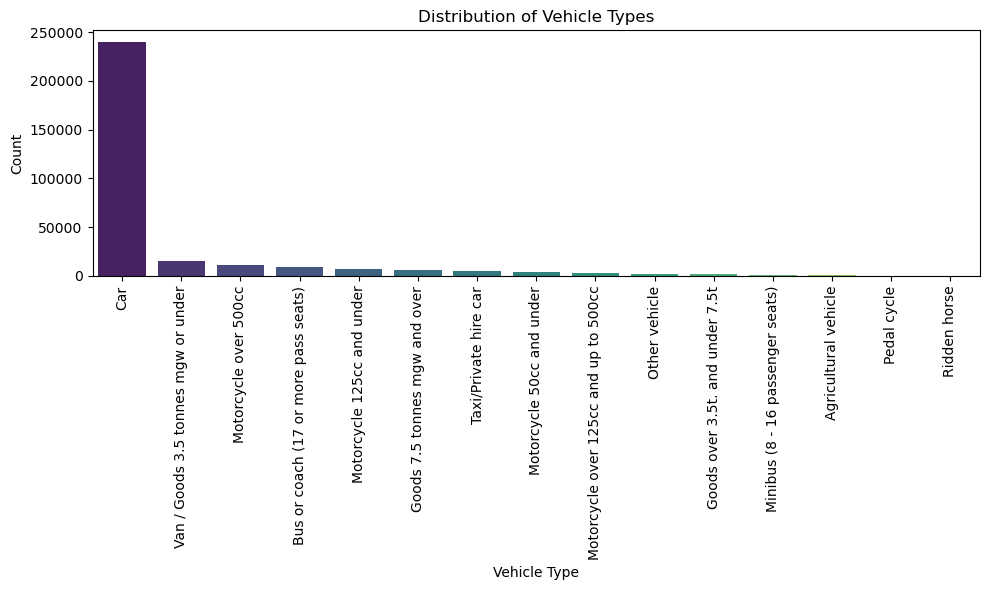

In [15]:
vehicle_type_counts = df['Vehicle_Type'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=vehicle_type_counts.index, y=vehicle_type_counts.values, palette="viridis")
plt.title('Distribution of Vehicle Types')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

In the above X-axis represents Vehicle type and Y-axis represents the count of accident happened due tondifferent vehicle. It is observed that maximum number of accident (i.e 240000) accident took from car

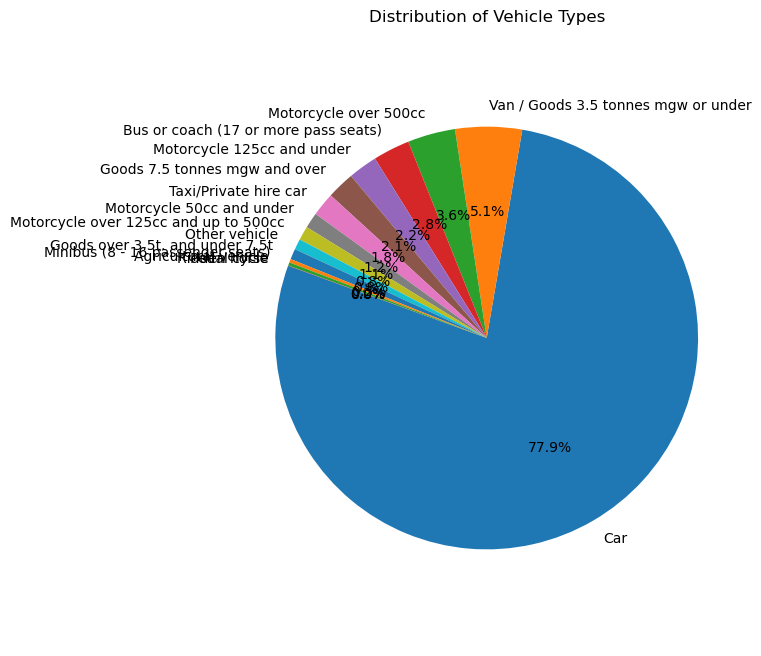

In [16]:
vehicle_counts = df['Vehicle_Type'].value_counts()
plt.figure(figsize=(6, 8))
plt.pie(vehicle_counts, labels=vehicle_counts.index, autopct='%1.1f%%', startangle=160)
plt.title('Distribution of Vehicle Types')
plt.axis('equal')  
plt.show()

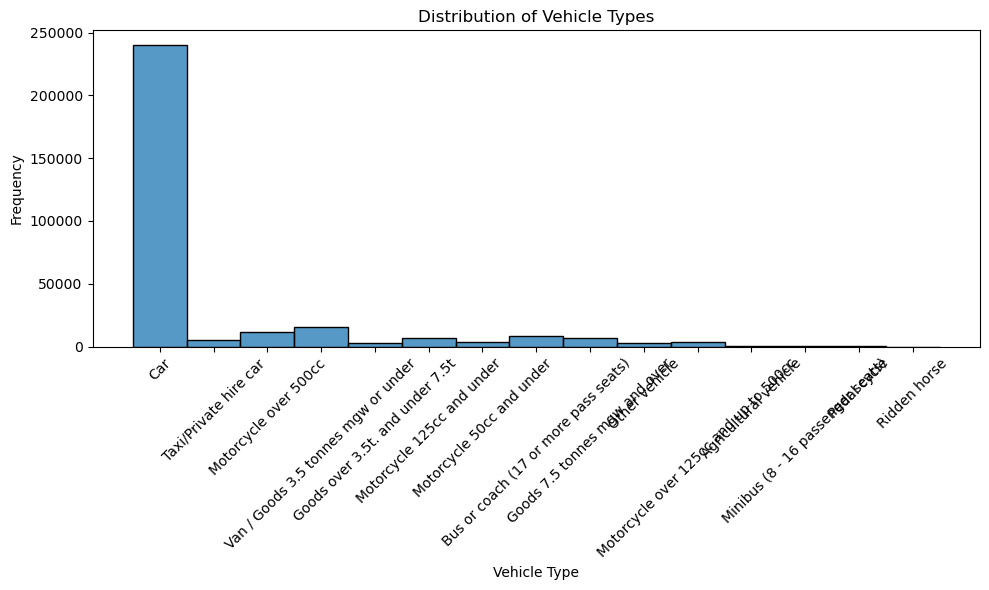

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Vehicle_Type', bins=20) 
plt.title('Distribution of Vehicle Types')
plt.xlabel('Vehicle Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

# Separting Numeric and category Data

In [18]:
df_num=df.select_dtypes(['float','int'])
df_num

,Number_of_Casualties,Number_of_Vehicles,Speed_limit
0,1,2,30
1,11,2,30
2,1,2,30
3,1,2,30
4,1,2,30
...,...,...,...
307968,2,1,60
307969,1,1,60
307970,1,3,30
307971,1,2,60


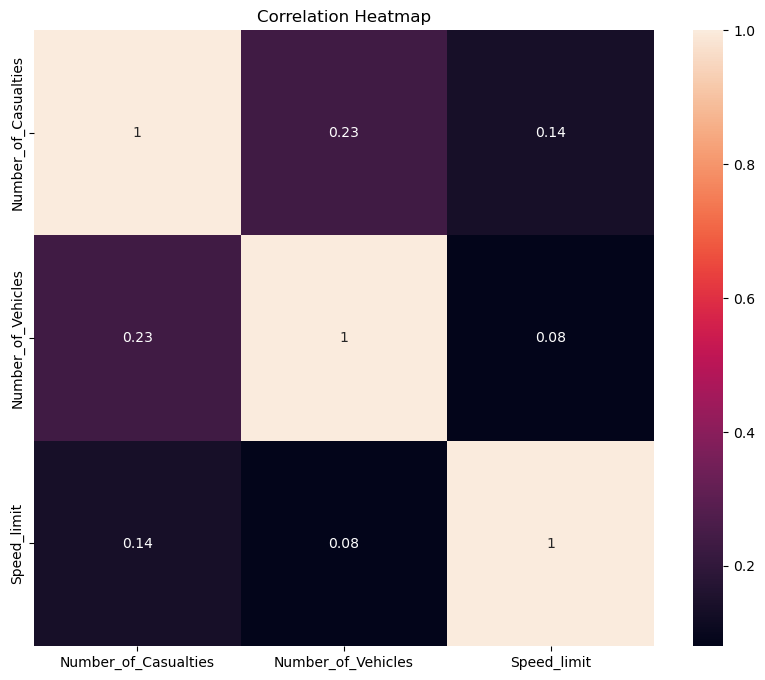

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_num.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [20]:
df_cat=df.select_dtypes(['object'])
df_cat

,Accident_Index,Accident Date,Junction_Control,Junction_Detail,Accident_Severity,Local_Authority_(District),Carriageway_Hazards,Police_Force,Road_Surface_Conditions,Time,Urban_or_Rural_Area,Vehicle_Type
0,200901BS70001,1/1/2021,Give way or uncontrolled,T or staggered junction,Serious,Kensington and Chelsea,Other object on road,Metropolitan Police,Dry,15:11,Urban,Car
1,200901BS70002,1/5/2021,Give way or uncontrolled,Crossroads,Serious,Kensington and Chelsea,Other object on road,Metropolitan Police,Wet or damp,10:59,Urban,Taxi/Private hire car
2,200901BS70003,1/4/2021,Give way or uncontrolled,T or staggered junction,Slight,Kensington and Chelsea,Other object on road,Metropolitan Police,Dry,14:19,Urban,Taxi/Private hire car
3,200901BS70004,1/5/2021,Auto traffic signal,T or staggered junction,Serious,Kensington and Chelsea,Other object on road,Metropolitan Police,Frost or ice,8:10,Urban,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Auto traffic signal,Crossroads,Serious,Kensington and Chelsea,Other object on road,Metropolitan Police,Dry,17:25,Urban,Car
...,...,...,...,...,...,...,...,...,...,...,...,...
307968,201091NM01760,2/18/2022,Data missing or out of range,Not at junction or within 20 metres,Slight,Highland,Other object on road,Northern,Dry,7:00,Rural,Car
307969,201091NM01881,2/21/2022,Data missing or out of range,Not at junction or within 20 metres,Slight,Highland,Other object on road,Northern,Frost or ice,3:00,Rural,Car
307970,201091NM01935,2/23/2022,Give way or uncontrolled,T or staggered junction,Slight,Highland,Other object on road,Northern,Frost or ice,9:38,Rural,Car
307971,201091NM01964,2/23/2022,Give way or uncontrolled,T or staggered junction,Serious,Highland,Other object on road,Northern,Wet or damp,18:25,Rural,Motorcycle over 500cc


In [21]:
df_cat=df.select_dtypes(['object'])
df_cat

,Accident_Index,Accident Date,Junction_Control,Junction_Detail,Accident_Severity,Local_Authority_(District),Carriageway_Hazards,Police_Force,Road_Surface_Conditions,Time,Urban_or_Rural_Area,Vehicle_Type
0,200901BS70001,1/1/2021,Give way or uncontrolled,T or staggered junction,Serious,Kensington and Chelsea,Other object on road,Metropolitan Police,Dry,15:11,Urban,Car
1,200901BS70002,1/5/2021,Give way or uncontrolled,Crossroads,Serious,Kensington and Chelsea,Other object on road,Metropolitan Police,Wet or damp,10:59,Urban,Taxi/Private hire car
2,200901BS70003,1/4/2021,Give way or uncontrolled,T or staggered junction,Slight,Kensington and Chelsea,Other object on road,Metropolitan Police,Dry,14:19,Urban,Taxi/Private hire car
3,200901BS70004,1/5/2021,Auto traffic signal,T or staggered junction,Serious,Kensington and Chelsea,Other object on road,Metropolitan Police,Frost or ice,8:10,Urban,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Auto traffic signal,Crossroads,Serious,Kensington and Chelsea,Other object on road,Metropolitan Police,Dry,17:25,Urban,Car
...,...,...,...,...,...,...,...,...,...,...,...,...
307968,201091NM01760,2/18/2022,Data missing or out of range,Not at junction or within 20 metres,Slight,Highland,Other object on road,Northern,Dry,7:00,Rural,Car
307969,201091NM01881,2/21/2022,Data missing or out of range,Not at junction or within 20 metres,Slight,Highland,Other object on road,Northern,Frost or ice,3:00,Rural,Car
307970,201091NM01935,2/23/2022,Give way or uncontrolled,T or staggered junction,Slight,Highland,Other object on road,Northern,Frost or ice,9:38,Rural,Car
307971,201091NM01964,2/23/2022,Give way or uncontrolled,T or staggered junction,Serious,Highland,Other object on road,Northern,Wet or damp,18:25,Rural,Motorcycle over 500cc


#   Using Label Encoder for converting category data into numeric

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le=LabelEncoder()

In [24]:
for i in df_cat:
    df_cat[i]=le.fit_transform(df_cat[i])
df_cat

,Accident_Index,Accident Date,Junction_Control,Junction_Detail,Accident_Severity,Local_Authority_(District),Carriageway_Hazards,Police_Force,Road_Surface_Conditions,Time,Urban_or_Rural_Area,Vehicle_Type
0,148,0,4,8,2,185,1,29,0,370,1,2
1,149,52,4,0,2,185,1,29,4,118,1,13
2,150,50,4,8,3,185,1,29,0,318,1,13
3,151,52,2,8,2,185,1,29,2,1329,1,9
4,152,54,2,0,2,185,1,29,0,504,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
307968,197639,265,3,3,3,172,1,34,0,1259,0,2
307969,197640,273,3,3,3,172,1,34,2,1019,0,2
307970,197641,277,4,8,3,172,1,34,2,1417,0,2
307971,197642,277,4,8,2,172,1,34,4,564,0,9


In [25]:
df_cat

,Accident_Index,Accident Date,Junction_Control,Junction_Detail,Accident_Severity,Local_Authority_(District),Carriageway_Hazards,Police_Force,Road_Surface_Conditions,Time,Urban_or_Rural_Area,Vehicle_Type
0,148,0,4,8,2,185,1,29,0,370,1,2
1,149,52,4,0,2,185,1,29,4,118,1,13
2,150,50,4,8,3,185,1,29,0,318,1,13
3,151,52,2,8,2,185,1,29,2,1329,1,9
4,152,54,2,0,2,185,1,29,0,504,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
307968,197639,265,3,3,3,172,1,34,0,1259,0,2
307969,197640,273,3,3,3,172,1,34,2,1019,0,2
307970,197641,277,4,8,3,172,1,34,2,1417,0,2
307971,197642,277,4,8,2,172,1,34,4,564,0,9


# Features Scaling

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
sc=StandardScaler()

In [28]:
x_scaled=sc.fit_transform(df_num)
x_scaled

array([[-0.43743271,  0.24059531, -0.63180315],
       [11.81963805,  0.24059531, -0.63180315],
       [-0.43743271,  0.24059531, -0.63180315],
       ...,
       [-0.43743271,  1.64810345, -0.63180315],
       [-0.43743271,  0.24059531,  1.5060285 ],
       [-0.43743271, -1.16691284,  1.5060285 ]])

In [29]:
df_scaled = pd.DataFrame(data=x_scaled, columns=df_num.columns)
print(df_scaled)

        Number_of_Casualties  Number_of_Vehicles  Speed_limit
0                  -0.437433            0.240595    -0.631803
1                  11.819638            0.240595    -0.631803
2                  -0.437433            0.240595    -0.631803
3                  -0.437433            0.240595    -0.631803
4                  -0.437433            0.240595    -0.631803
...                      ...                 ...          ...
307968              0.788274           -1.166913     1.506029
307969             -0.437433           -1.166913     1.506029
307970             -0.437433            1.648103    -0.631803
307971             -0.437433            0.240595     1.506029
307972             -0.437433           -1.166913     1.506029

[307973 rows x 3 columns]


# Concatenate Numerical and Categorical Columns

In [30]:
df_new=pd.concat([df_num,df_cat],axis=1)
df_new

,Number_of_Casualties,Number_of_Vehicles,Speed_limit,Accident_Index,Accident Date,Junction_Control,Junction_Detail,Accident_Severity,Local_Authority_(District),Carriageway_Hazards,Police_Force,Road_Surface_Conditions,Time,Urban_or_Rural_Area,Vehicle_Type
0,1,2,30,148,0,4,8,2,185,1,29,0,370,1,2
1,11,2,30,149,52,4,0,2,185,1,29,4,118,1,13
2,1,2,30,150,50,4,8,3,185,1,29,0,318,1,13
3,1,2,30,151,52,2,8,2,185,1,29,2,1329,1,9
4,1,2,30,152,54,2,0,2,185,1,29,0,504,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307968,2,1,60,197639,265,3,3,3,172,1,34,0,1259,0,2
307969,1,1,60,197640,273,3,3,3,172,1,34,2,1019,0,2
307970,1,3,30,197641,277,4,8,3,172,1,34,2,1417,0,2
307971,1,2,60,197642,277,4,8,2,172,1,34,4,564,0,9


# Splitting Data into X and Y

In [31]:
x=df_new.drop("Urban_or_Rural_Area",axis=1)
x

,Number_of_Casualties,Number_of_Vehicles,Speed_limit,Accident_Index,Accident Date,Junction_Control,Junction_Detail,Accident_Severity,Local_Authority_(District),Carriageway_Hazards,Police_Force,Road_Surface_Conditions,Time,Vehicle_Type
0,1,2,30,148,0,4,8,2,185,1,29,0,370,2
1,11,2,30,149,52,4,0,2,185,1,29,4,118,13
2,1,2,30,150,50,4,8,3,185,1,29,0,318,13
3,1,2,30,151,52,2,8,2,185,1,29,2,1329,9
4,1,2,30,152,54,2,0,2,185,1,29,0,504,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307968,2,1,60,197639,265,3,3,3,172,1,34,0,1259,2
307969,1,1,60,197640,273,3,3,3,172,1,34,2,1019,2
307970,1,3,30,197641,277,4,8,3,172,1,34,2,1417,2
307971,1,2,60,197642,277,4,8,2,172,1,34,4,564,9


In [32]:
y=df_new["Urban_or_Rural_Area"]
y

0         1
1         1
2         1
3         1
4         1
         ..
307968    0
307969    0
307970    0
307971    0
307972    0
Name: Urban_or_Rural_Area, Length: 307973, dtype: int32

In [33]:
y.value_counts()

Urban_or_Rural_Area
1    198532
0    109441
Name: count, dtype: int64

In [47]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42) #universally accepted
x_ros, y_ros = ros.fit_resample(x, y)

In [48]:
x=x_ros
y=y_ros

#  Model Evaluation

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=45)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Creating A Function to create report of all Models

In [36]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(random_state=42)

In [37]:
def mymodel(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(classification_report(y_test,y_pred))
    return model

In [38]:
mymodel(logreg)

              precision    recall  f1-score   support

           0       0.71      0.64      0.68     44020
           1       0.81      0.86      0.83     79170

    accuracy                           0.78    123190
   macro avg       0.76      0.75      0.75    123190
weighted avg       0.78      0.78      0.78    123190



LogisticRegression()

In [39]:
mymodel(knn)

              precision    recall  f1-score   support

           0       0.73      0.65      0.69     44020
           1       0.82      0.87      0.84     79170

    accuracy                           0.79    123190
   macro avg       0.78      0.76      0.77    123190
weighted avg       0.79      0.79      0.79    123190



KNeighborsClassifier()

In [40]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.77      0.77      0.77     44020
           1       0.87      0.87      0.87     79170

    accuracy                           0.83    123190
   macro avg       0.82      0.82      0.82    123190
weighted avg       0.83      0.83      0.83    123190



DecisionTreeClassifier()

In [41]:
mymodel(rf)

              precision    recall  f1-score   support

           0       0.87      0.76      0.81     44020
           1       0.88      0.94      0.91     79170

    accuracy                           0.87    123190
   macro avg       0.87      0.85      0.86    123190
weighted avg       0.87      0.87      0.87    123190



RandomForestClassifier(random_state=42)

In this project, we build various models like logistic regression, knn classifier,decision tree classifier & random forest classifier

A Random Forest Classifier gives the highest accuracy score of 87.00 percent among all the ML Models.

Thus, for the Road Accident Dataset, the best accuracy can be achieved Random Forest Classifier Model.